In [1]:
# prompt: 파일 업로드

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving 서울_1997.csv to 서울_1997.csv
User uploaded file "서울_1997.csv" with length 11299 bytes


In [2]:
import pandas as pd

# 앞의 7줄을 건너뛰고 CSV 파일 읽기
df = pd.read_csv('서울_1997.csv', encoding='cp949', sep=',', skiprows=7)

# 데이터 정보 출력
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       365 non-null    object 
 1   지점       365 non-null    int64  
 2   평균기온(℃)  365 non-null    float64
 3   최저기온(℃)  365 non-null    float64
 4   최고기온(℃)  365 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.4+ KB


<ipython-input-3-ecaa045b1b96>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df.fillna(method='ffill')


Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
Index(['날짜', '지점', 'avg_temp', 'min_temp', 'max_temp'], dtype='object')


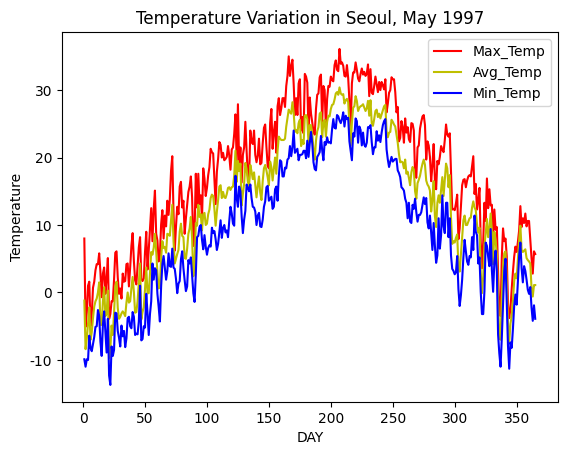

<Figure size 640x480 with 0 Axes>

In [3]:
df2 = df.fillna(method='ffill')
print(df2.columns)
df2.rename(columns={'최저기온(℃)':'min_temp'}, inplace=True)
df2.rename(columns={'평균기온(℃)':'avg_temp'}, inplace=True)
df2.rename(columns={'최고기온(℃)':'max_temp'}, inplace=True)
print(df2.columns)
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.title('Temperature Variation in Seoul, May 1997')
plt.plot(range(1,len(df)+1), df2['max_temp'], label='Max_Temp', c='r')
plt.plot(range(1,len(df)+1), df2['avg_temp'], label='Avg_Temp', c='y')
plt.plot(range(1,len(df)+1), df2['min_temp'], label='Min_Temp', c='b')
plt.xlabel('DAY')
plt.ylabel('Temperature')
plt.legend()
plt.show()
plt.savefig('서울생일기온.png')